In [ ]:
!pip install tensorflow

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from keras import Model, layers
from keras.models import load_model, model_from_json
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.layers import Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.callbacks import (
    Callback,
    CSVLogger,
    EarlyStopping,
    ReduceLROnPlateau,
    ModelCheckpoint
)

In [ ]:
print(tf.__version__)
print(tf.config.list_logical_devices('GPU'))

tf.test.is_gpu_available()

2.18.0


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


[LogicalDevice(name='/device:GPU:0', device_type='GPU')]


True

In [ ]:
data_path = '/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset'

# Data Augmentation
datagen = ImageDataGenerator(
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    preprocessing_function=preprocess_input
    )
# Train generator (80%)
train_generator = datagen.flow_from_directory(
    data_path,
    subset='training',
    batch_size=32,
    class_mode='categorical',
    target_size=(256, 256),
    shuffle=True,
    )
# Validation generator (20%)
validation_generator = datagen.flow_from_directory(
    data_path,
    subset='validation',
    shuffle=False,
    class_mode='categorical',
    batch_size=32,
    target_size=(256, 256)
    )

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


Class Names: ['Cataract', 'Diabetic Retinopathy', 'Glaucoma', 'Healthy', 'Macular Scar', 'Myopia']


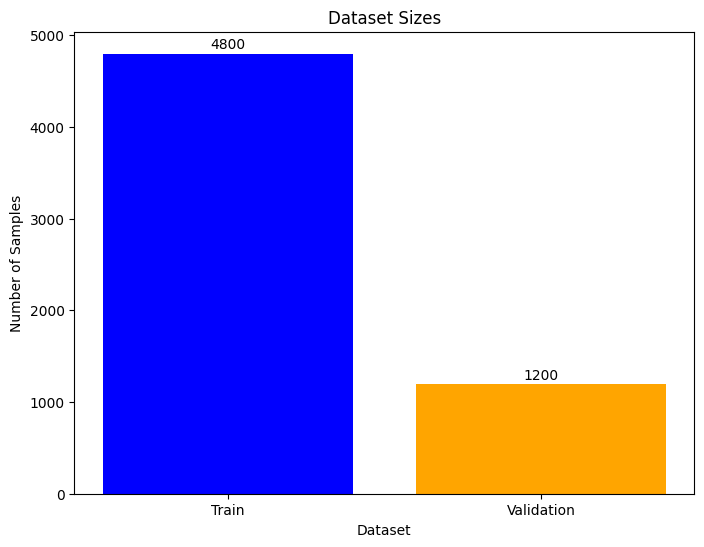

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Lấy tên lớp
class_names = list(train_generator.class_indices.keys())
print("Class Names:", class_names)

# Lấy số lượng mẫu trong từng tập
train_size = train_generator.samples
val_size = validation_generator.samples

# Vẽ biểu đồ
dataset_sizes = [train_size, val_size]
dataset_labels = ['Train', 'Validation']

plt.figure(figsize=(8, 6))
plt.bar(dataset_labels, dataset_sizes, color=['blue', 'orange'])
plt.title('Dataset Sizes')
plt.xlabel('Dataset')
plt.ylabel('Number of Samples')

# Thêm nhãn số trên cột
for i, size in enumerate(dataset_sizes):
    plt.text(i, size + 20, str(size), ha='center', va='bottom')

plt.show()

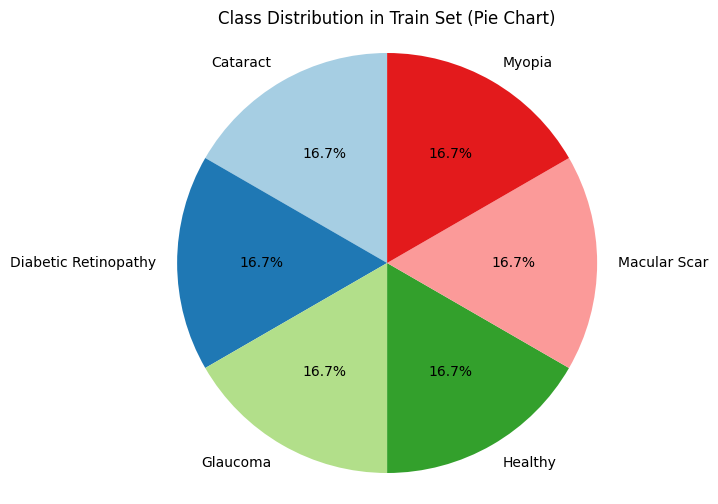

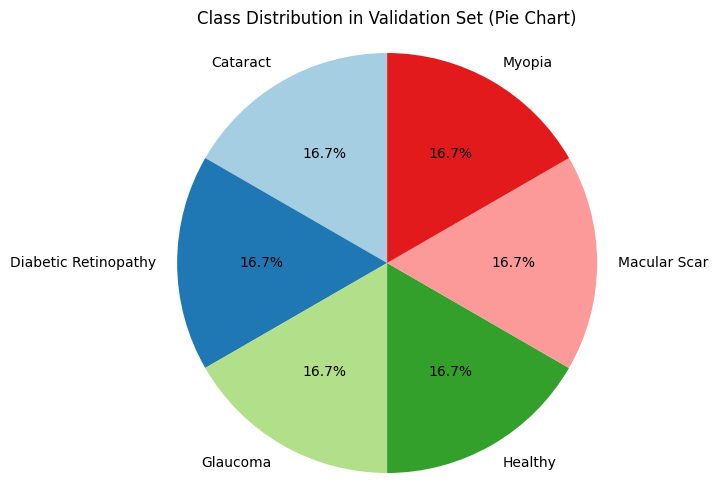

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Lấy tên lớp
class_names = list(train_generator.class_indices.keys())

def plot_class_distribution_pie(generator, generator_name):
    labels = generator.classes
    class_counts = np.bincount(labels)

    plt.figure(figsize=(8, 6))
    plt.pie(class_counts, labels=class_names,
            autopct='%1.1f%%', startangle=90,
            colors=plt.cm.Paired.colors[:len(class_names)])
    plt.title(f'Class Distribution in {generator_name} Set (Pie Chart)')
    plt.axis('equal')
    plt.show()

# Vẽ biểu đồ phân bố lớp
plot_class_distribution_pie(train_generator, 'Train')
plot_class_distribution_pie(validation_generator, 'Validation')

In [ ]:
# Get the class names from the subdirectories in the training directory
class_names = sorted(os.listdir(data_path))

# Print the class names and the number of classes
print("Class Names:", class_names)
num_classes = len(class_names)
print("Number of Classes:", num_classes)

Class Names: ['Cataract', 'Diabetic Retinopathy', 'Glaucoma', 'Healthy', 'Macular Scar', 'Myopia']
Number of Classes: 6


In [ ]:
def visualize_images(path, target_size=(256, 256), num_images=5):

    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image and resize
        image_path = os.path.join(path, image_filename)
        image = Image.open(image_path)
        image = image.resize(target_size)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

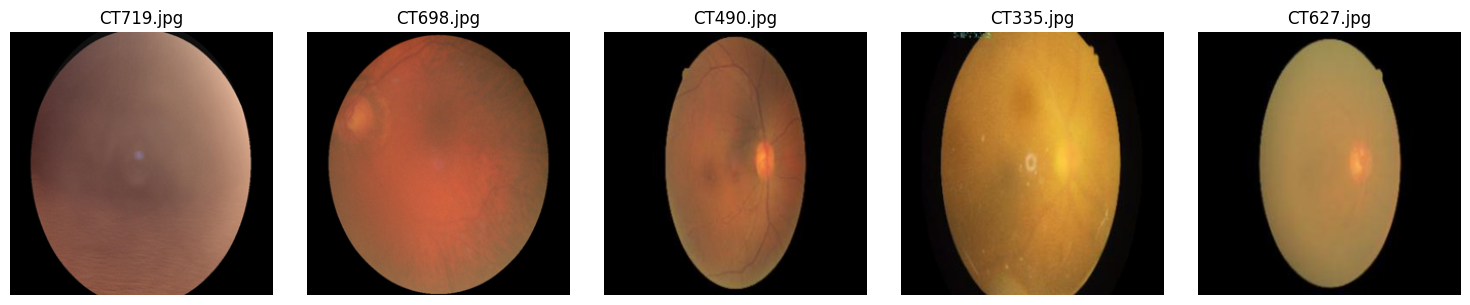

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset/Cataract"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

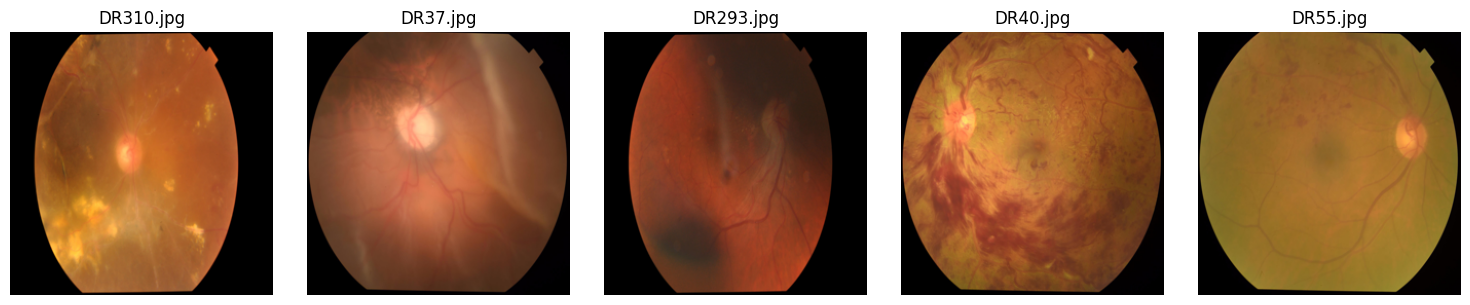

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset/Diabetic Retinopathy"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

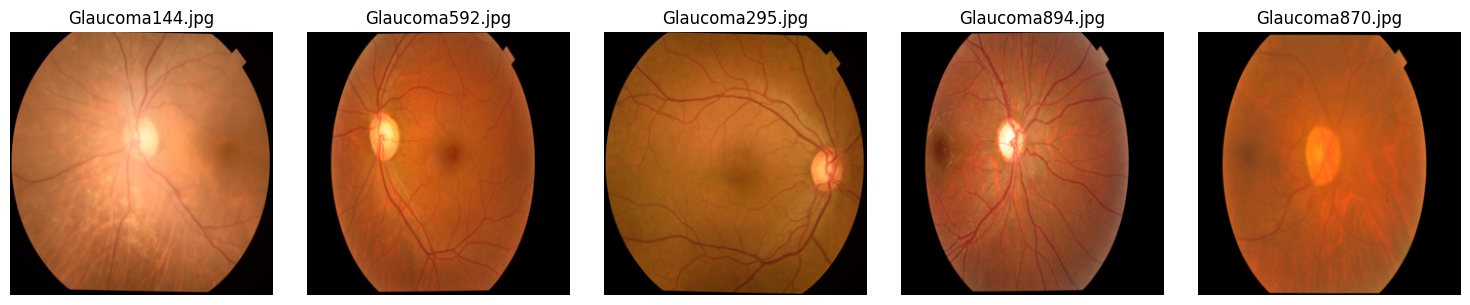

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset/Glaucoma"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

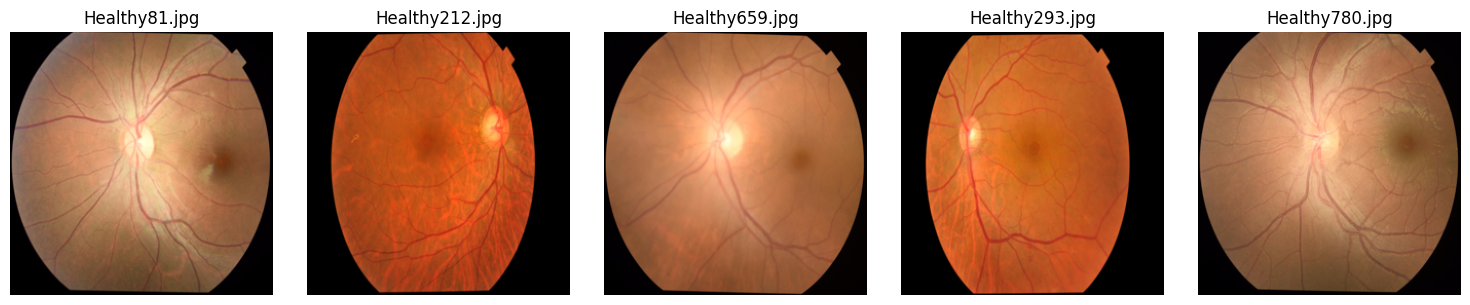

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset/Healthy"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

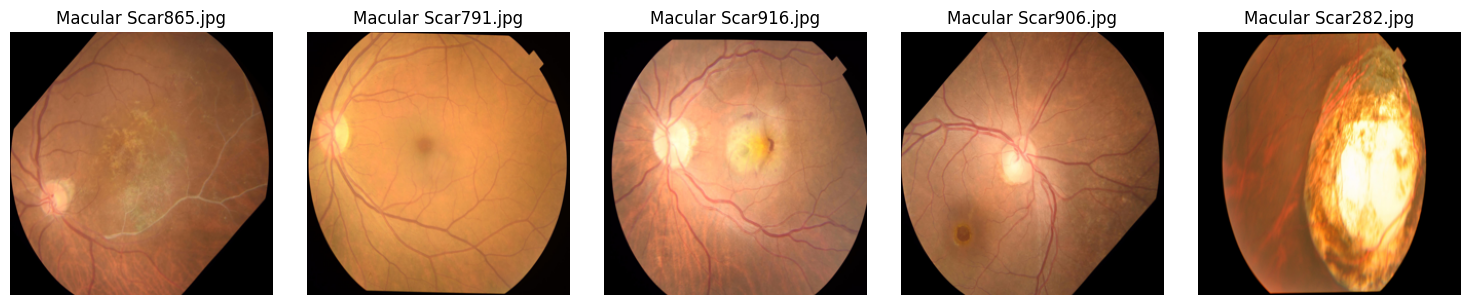

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset/Macular Scar"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

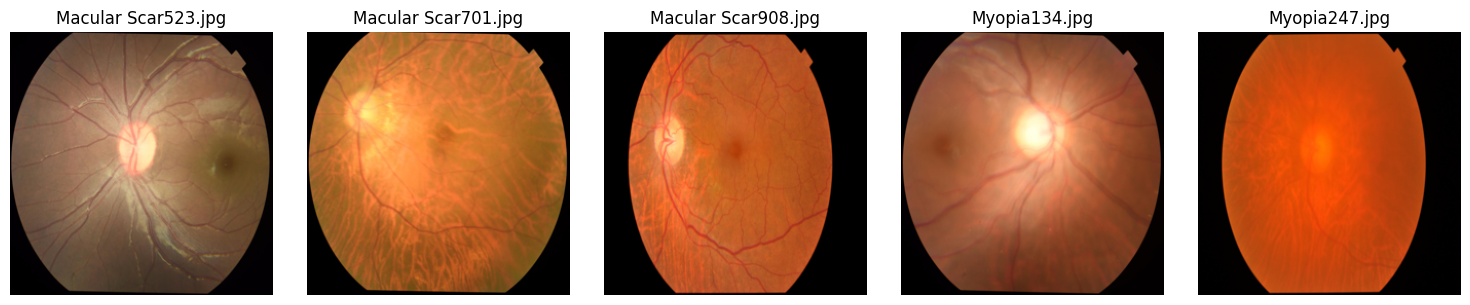

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset/Myopia"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

In [ ]:
from tensorflow.keras import regularizers

base_model = MobileNetV2(weights='imagenet', include_top=False,
                         input_shape=(256, 256, 3))
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu', kernel_regularizer = regularizers.l2(0.01))(x)
x = layers.Dropout(0.2)(x)
predictions = layers.Dense(4, activation='softmax', kernel_regularizer = regularizers.l2(0.01))(x)
models = Model(inputs=base_model.input, outputs=predictions)
models.summary()

<ipython-input-5-7813b72adb0f>:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False,


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 128, 128,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 128, 128,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 128, 128,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 128, 128,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 128, 128,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 128, 128,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 128, 128,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 128, 128,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 128, 128,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 128, 128,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 128, 128,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 129, 129,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 64, 64,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 64, 64,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 64, 64,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 64, 64,    │      2,304 │ block_1_depthwis

 Total params: 2,915,908 (11.12 MB)

 Trainable params: 2,881,796 (10.99 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
checkpoint_callback = ModelCheckpoint(
    '/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/best_mobilenetv2_1.h5',
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    save_best_only=True
)
early_stopping_callback = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

csv_logger_callback = CSVLogger(
    '/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/training_history_1.csv', append=True
)
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6,
    verbose=1
)


for layer in base_model.layers:
    layer.trainable = False

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

models.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [ ]:
# Train the model
history = models.fit(
    x=train_generator,
    epochs=15,
    validation_data=validation_generator,
    callbacks=[checkpoint_callback, early_stopping_callback, csv_logger_callback]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.6790 - loss: 5.6545 
Epoch 1: val_accuracy improved from -inf to 0.81375, saving model to /content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/best_mobilenetv2_1.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 2215s 22s/step - accuracy: 0.6798 - loss: 5.6370 - val_accuracy: 0.8138 - val_loss: 1.9324
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8159 - loss: 1.6115
Epoch 2: val_accuracy did not improve from 0.81375
100/100 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.8158 - loss: 1.6096 - val_accuracy: 0.7788 - val_loss: 1.1624
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8106 - loss: 1.0607
Epoch 3: val_accuracy improved from 0.81375 to 0.81750, saving model to /content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/best_mobilenetv2_1.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.8107 - loss: 1.0598 - val_accuracy: 0.8175 - val_loss: 0.8563
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8400 - loss: 0.7737
Epoch 4: val_accuracy did not improve from 0.81750
100/100 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.8399 - loss: 0.7736 - val_accuracy: 0.7962 - val_loss: 0.7432
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8349 - loss: 0.6785
Epoch 5: val_accuracy improved from 0.81750 to 0.82375, saving model to /content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/best_mobilenetv2_1.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8349 - loss: 0.6784 - val_accuracy: 0.8238 - val_loss: 0.6543
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8243 - loss: 0.6445
Epoch 6: val_accuracy did not improve from 0.82375
100/100 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.8243 - loss: 0.6444 - val_accuracy: 0.8087 - val_loss: 0.6673
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8238 - loss: 0.6185
Epoch 7: val_accuracy did not improve from 0.82375
100/100 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.8239 - loss: 0.6184 - val_accuracy: 0.8062 - val_loss: 0.6455
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7991 - loss: 0.6396
Epoch 8: val_accuracy did not improve from 0.82375
100/100 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.7993 - loss: 0.6393 - val_accuracy: 0.8200 - val_loss: 0.6105
Epoch 9/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8325 - loss: 0.5886
Epoch 9: val_accuracy did not impro

In [ ]:
models.save('/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/last_mobilenetv2_1.h5')

In [ ]:
model_path = '/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/best_mobilenetv2_1.h5'
model = load_model(model_path)

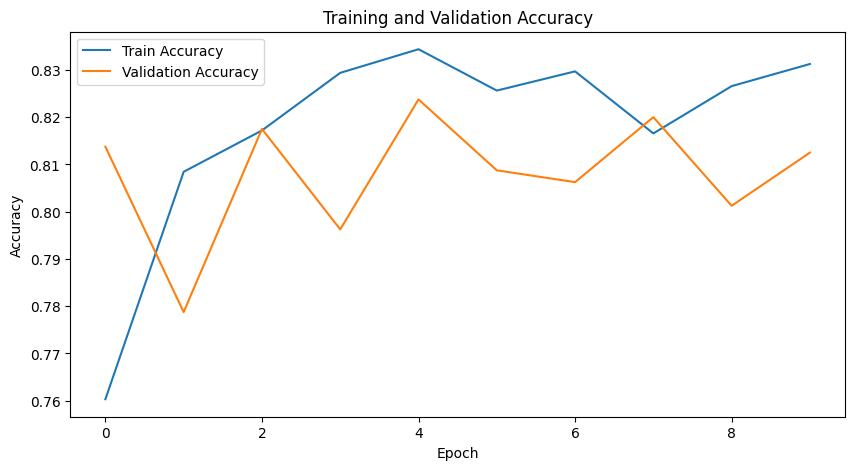

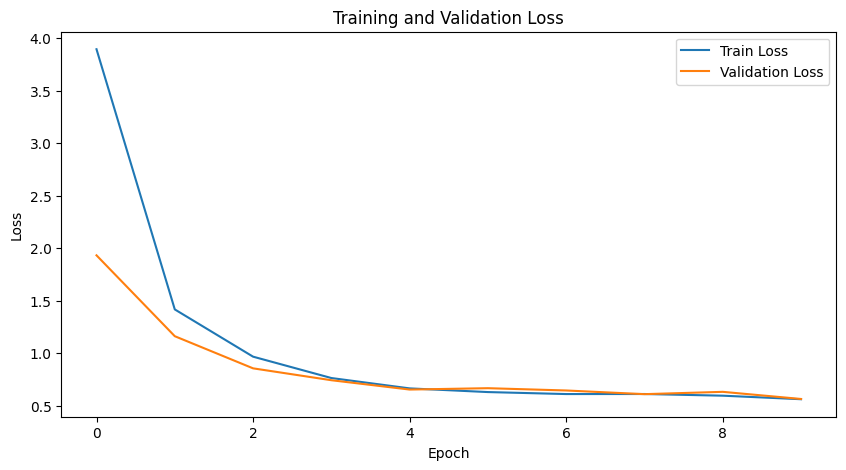

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.read_csv('/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/training_history_1.csv')

# Vẽ Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy qua các Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.savefig('/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/accuracy_plot.webp_2', format='webp')
plt.show()

# Vẽ Loss
plt.figure(figsize=(10, 5))
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Loss qua các Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.savefig('/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/loss_plot.webp_2', format='webp')
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step


<Figure size 1000x800 with 0 Axes>

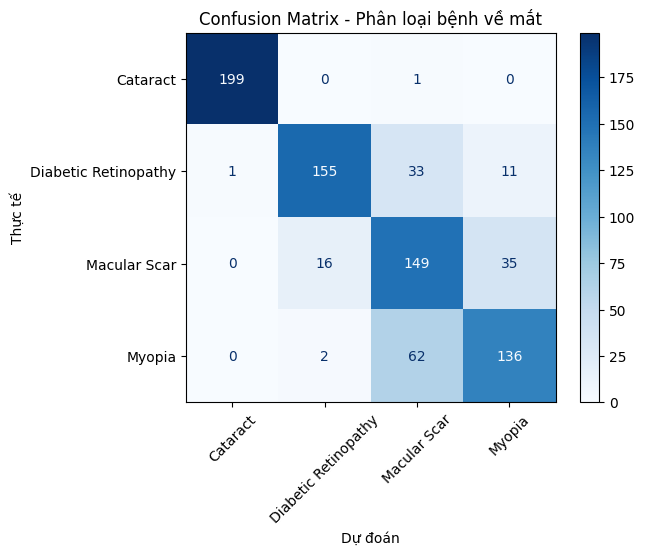

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_probs = model.predict(validation_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

y_true = validation_generator.classes

class_names = list(validation_generator.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', values_format='d')
plt.xticks(rotation=45)
plt.title('Confusion Matrix - Phân loại bệnh về mắt')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

In [ ]:
from PIL import Image

validation_img_paths = ["/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset/Cataract/CT102.jpg",
                        "/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset/Diabetic Retinopathy/DR105.jpg",
                        "/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset/Macular Scar/Macular Scar1000.jpg",
                        "/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset/Myopia/Macular Scar537.jpg"]
img_list = [Image.open(img_path) for img_path in validation_img_paths]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


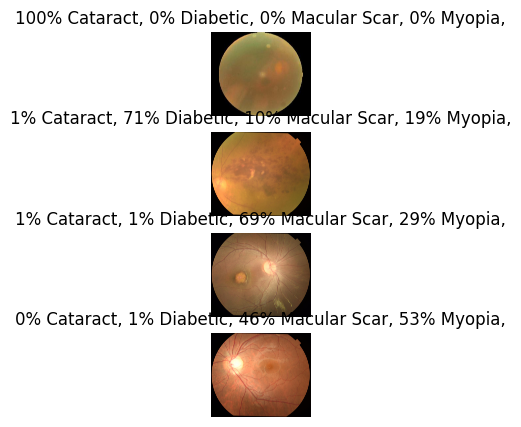

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

validation_batch = np.stack([preprocess_input(np.array(img.resize((256, 256)))) for img in img_list])

pre_prob = model.predict(validation_batch)

fig, axs = plt.subplots(4, 1, figsize=(20, 5))
for i, img in enumerate(img_list):
  ax = axs[i]
  ax.axis('off')
  ax.set_title("{:.0f}% Cataract, {:.0f}% Diabetic, {:.0f}% Macular Scar, {:.0f}% Myopia,".format(100*pre_prob[i][0], 100*pre_prob[i][1], 100*pre_prob[i][2], 100*pre_prob[i][3]))
  ax.imshow(img)